In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from PIL import Image
import os
from sklearn import tree



In [2]:
image_size=(128,128)
data_dir_aug="Brain MRI\\Augmented Data"
data_dir_raw="Brain MRI\\Raw Data\\Raw"
catgories=["Glioma","Meningioma","Normal","Pituitary"]
X=[]
y=[]

In [14]:
le=LabelEncoder()
le.fit_transform(catgories)

array([0, 1, 2, 3])

In [3]:
for lable,cetagory in enumerate(catgories):
    folder=os.path.join(data_dir_raw,cetagory)
    for filname in os.listdir(folder):
        try:
            img_path=os.path.join(folder,filname)
            img=Image.open(img_path).convert("L")    # Convert to grayscale
            img=img.resize(image_size)
            image_array=np.array(img).flatten()/255
            
            X.append(image_array)
            y.append(lable)
        except Exception as e:
            print(f"erorr loading{filname}: {e}")

In [4]:
len(X)

1505

In [5]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
svm_mdl=SVC(kernel="linear",C=1.0)

In [11]:
svm_mdl.fit(train_x,train_y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
svm_mdl.score(test_x,test_y)

0.813953488372093

## Test score of model by varing the value of C in model
| Value of C  | Karnel    | test score    |
|---------    |-----      |----------|
| 1           | Linear    | 0.81395  |
| 2.0         | Linear    | 0.8139   |


In [15]:
train_y_pred=svm_mdl.predict(train_x)
test_y_pred=svm_mdl.predict(test_x)

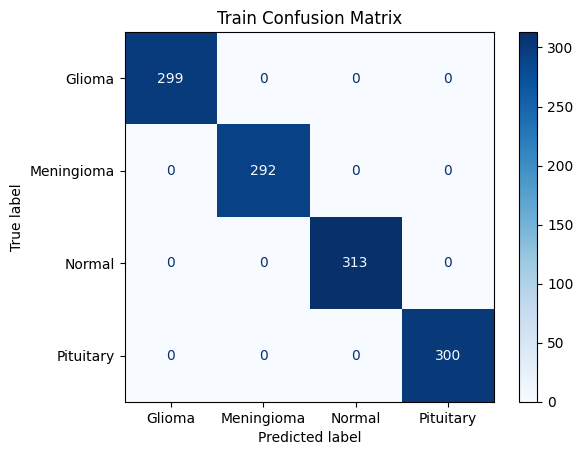

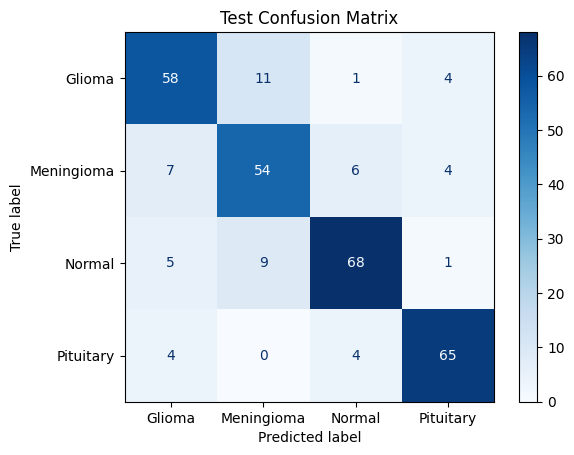

In [16]:
cm=confusion_matrix(train_y,train_y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

cm=confusion_matrix(test_y,test_y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()